### S08-L006-LAB Wykres scatter hexbin area
1. Uruchom poniższy fragment kodu, aby przygotować dane do rysowania wykresu (wszystkie zastosowane polecenia powinny Ci już być na tymetapie znane):
         
        import pandas as pd
        import numpy as np
        import matplotlib as plt
        %matplotlib inline
        marathon = pd.read_csv("./course-files/marathon_results_2017.csv", 
                               usecols=["Age","M/F","Country","40K"]) 
        marathon['40K'] = marathon['40K'].replace('-', 0)
        marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds()) 
        marathon.head(5)
       
2. Wyświetl wykres punktowy prezentujący zależność wieku (kolumna Age) od czasu potrzebnego do przebiegnięcia maratonu (kolumnaTotalSeconds)
3. Korzystając z data frame marathon utwórz dwa nowe obiekty data frame: marathon_m z wynikami mężczyzn (w kolumnie M/F znajduje sięwartość M) oraz marathin_w z wynikami kobiet (w kolumnie M/F znajduje się F)
4. Korzystając z data frame marathon_m i marathon_w utwórz wykres punktowy nakładając na wyniki mężczyzn wyniki kobiet. Odpowiedz napytanie "czy wśród osób po 70-ce chętniej biegają panowie czy panie".
5. Korzystając z data frame marathon_m i marathon_w utwórz dwa oddzielne wykresy typu hexbin. Poeksperymentuj z parametrem gridsize
6. Wykonaj poniższe polecenia importujące dane do kolejnego wykresu:
         import datetime
         #Import data
         nasa = pd.read_csv("nasa_facebook_statuses.csv",
         usecols=["status_published","num_likes"])
         #Convert column type to date time
         nasa["status_published"] = pd.to_datetime(nasa["status_published"])
         #Select observations between two datetimes - May 2015
         filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1') nasa = nasa[filter]
         #Add column with day only
         nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
         #Group all columns by sum
         nasa_by_day = nasa.groupby(by='day').sum()
         #Import data
         bean = pd.read_csv("mrbean_facebook_statuses.csv",
         usecols=["status_published","num_likes"])
         #Convert column type to date time
         bean["status_published"] = pd.to_datetime(bean["status_published"])

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
marathon = pd.read_csv("./course-files/marathon_results_2017.csv", 
                       usecols=["Age","M/F","Country","40K"]) 
marathon['40K'] = marathon['40K'].replace('-', 0)
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds()) 
marathon.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

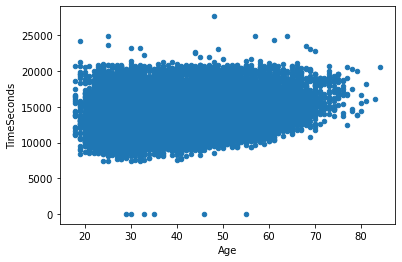

In [3]:
marathon.plot.scatter(x='Age',y='TimeSeconds')

In [5]:
filter_m = marathon['M/F'] == 'M'

In [9]:
marathon_m = marathon[filter_m]

In [7]:
 filter_f = marathon['M/F'] == 'F'

In [10]:
marathin_w = marathon[filter_f]

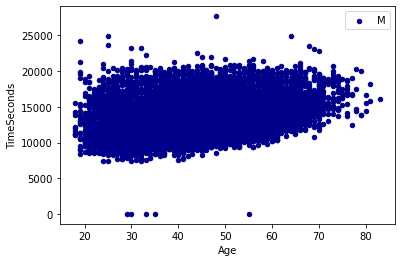

In [11]:
ax = marathon_m.plot.scatter(x='Age',y='TimeSeconds', c='DarkBlue', label= 'M' )

In [13]:
marathin_w.plot.scatter(x='Age',y='TimeSeconds', c='Pink', label= 'F', ax=ax )

<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

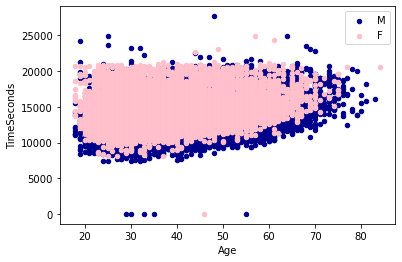

In [14]:
ax = marathon_m.plot.scatter(x='Age',y='TimeSeconds', c='DarkBlue', label= 'M',  )
marathin_w.plot.scatter(x='Age',y='TimeSeconds', c='Pink', label= 'F', ax=ax )

<AxesSubplot:xlabel='XXXXXXX', ylabel='YYYYYY'>

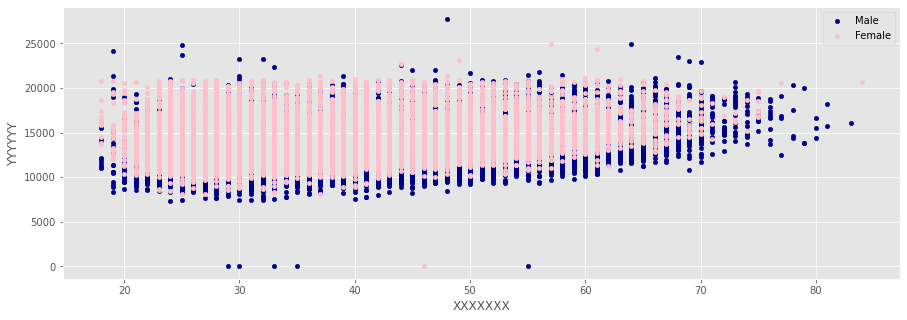

In [61]:
ax = marathon_m.plot.scatter(x='Age',y='TimeSeconds', c='DarkBlue', label= 'Male', figsize=(15,5) )
marathin_w.plot.scatter(x='Age',y='TimeSeconds', c='Pink', label= 'Female',figsize=(15,5), ax=ax, ylabel = 'YYYYYY', xlabel='XXXXXXX' )

[]

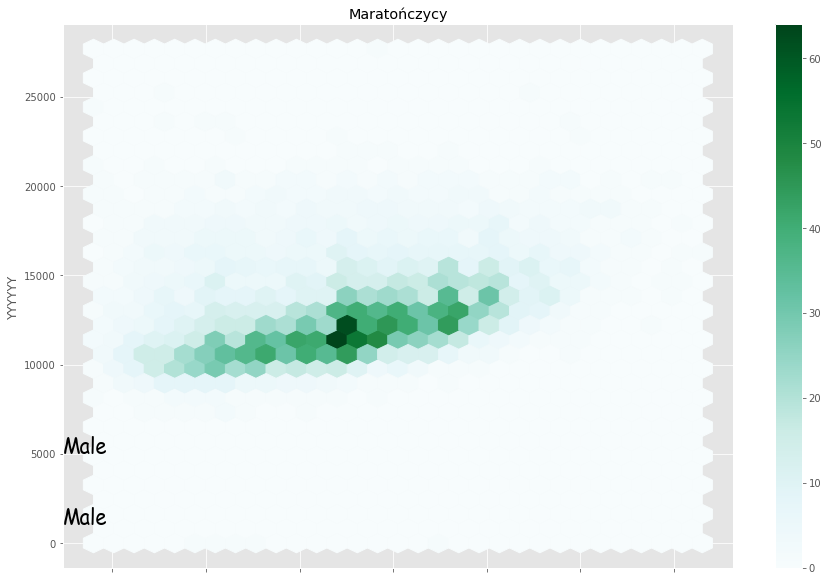

In [62]:
ax = marathon_m.plot.hexbin(x='Age',y='TimeSeconds',figsize=(15,10),gridsize=30, label = True, 
                            bins=marathon_m['Age'].nunique(), title='Maratończycy', ylabel = 'YYYYYY', )
ax.text(ax.get_xlim()[0], 5100, 'Male', clip_on=True, family='Comic Sans MS', size=20)
ax.text(ax.get_xlim()[0], 1100, 'Male', clip_on=True, family='Comic Sans MS', size=20)

ax.plot()


In [27]:
marathon_m['Age'].nunique()

65

<AxesSubplot:xlabel='Age', ylabel='TimeSeconds'>

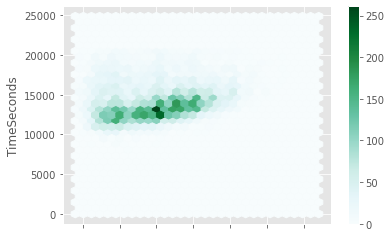

In [64]:
marathin_w.plot.hexbin(x="Age",y="TimeSeconds",gridsize=30)